# EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
from ipyleaflet import Map, Marker, MarkerCluster, Popup
import folium
from folium.plugins import MarkerCluster


import seaborn as sns
sns.set()

In [2]:
homicidios=pd.read_csv('homicidios1.csv')

In [3]:
homicidios.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     717 non-null    int64  
 1   fecha          717 non-null    object 
 2   rol            717 non-null    object 
 3   sexo           717 non-null    object 
 4   edad           717 non-null    int64  
 5   id             717 non-null    object 
 6   n_victimas     717 non-null    int64  
 7   hora           717 non-null    object 
 8   t_calle        717 non-null    object 
 9   calle          717 non-null    object 
 10  direccion      717 non-null    object 
 11  comuna         717 non-null    int64  
 12  longitud       716 non-null    float64
 13  latitud        716 non-null    float64
 14  participantes  717 non-null    object 
 15  victima        717 non-null    object 
 16  acusado        717 non-null    object 
dtypes: float64(2), int64(4), object(11)
memory usage: 95.4

C:\Users\Owner\AppData\Local\Temp\ipykernel_18420\2689165761.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


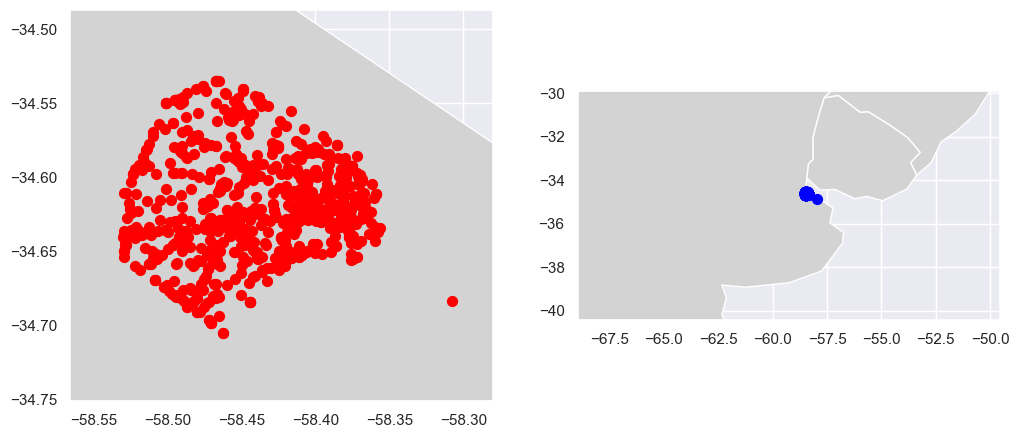

In [4]:
gdf = gpd.GeoDataFrame(geometry=gpd.points_from_xy(homicidios['longitud'], homicidios['latitud']))

# cargamos un mapa
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

world.plot(ax=axs[0], color='lightgray')
gdf.plot(ax=axs[0], color='red', marker='o', markersize=50)


axs[0].set_xlim(-58.56570419488332, -58.279726031282905)
axs[0].set_ylim(-34.75134000696717, -34.48682715389177)

world.plot(ax=axs[1], color='lightgray')

gdf.plot(ax=axs[1], color='blue', marker='o', markersize=50)

axs[1].set_xlim(-68.96308932882374, -49.525571922113436)
axs[1].set_ylim(-40.434372403371235, -29.890577965759373)

plt.show()

In [5]:

# Se va a crear un mapa interactivo
# Crear una instancia de Mapa
m = folium.Map(location=(homicidios['latitud'].mean(), homicidios['longitud'].mean()), zoom_start=10)

# Crear un grupo de marcadores (MarkerCluster) para los puntos de coordenadas
marker_cluster = MarkerCluster()

# Agregar Marcadores al grupo (MarkerCluster), omitiendo las filas con coordenadas NaN
for _, row in homicidios.dropna(subset=['latitud', 'longitud']).iterrows():
    marker = folium.Marker(location=(row['latitud'], row['longitud']))
    popup = folium.Popup(
        location=(row['latitud'], row['longitud']),
        close_button=False,
        auto_close=False,
        close_on_escape_key=False
    )
    marker.add_child(popup)
    marker_cluster.add_child(marker)

# Agregar el grupo de marcadores al Mapa
m.add_child(marker_cluster)

# Mostrar el mapa
m

En el gráfico anterior se puede visualizar que los eventos se circunscriben a la ciudad de Buenos Aires y se puede apreciar una ligera concentracion en las comunas 1, 3, 4, 15, 11 y 7, sin embargo esto debe ser explorado más adelante en la investigación

## EXPLORACION TEMPORAL

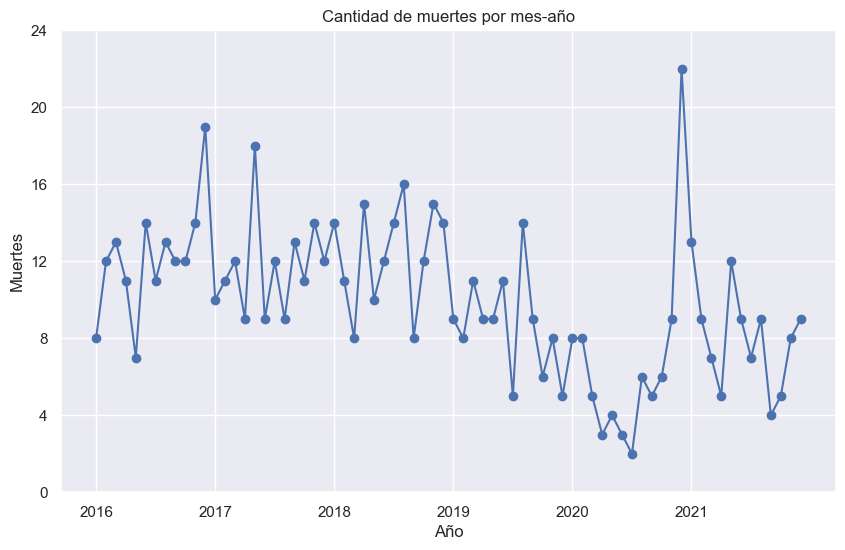

In [30]:

# Convertir la columna 'fecha' a formato de fecha
homicidios['fecha'] = pd.to_datetime(homicidios['fecha'])

# Columnas nuevas
homicidios['year'] = homicidios['fecha'].dt.year
homicidios['month'] = homicidios['fecha'].dt.month

# Agrupamos por año y mes, contando el número de eventos
events_by_month_year = homicidios.groupby(['year', 'month']).size().reset_index(name='count')

# Ordenar el DataFrame por año y mes
events_by_month_year = events_by_month_year.sort_values(by=['year', 'month'])

# Crear una figura para el gráfico con tamaño específico
plt.figure(figsize=(10, 6))

# Crear una columna 'month_year' concatenando año y mes como string
events_by_month_year['month_year'] = events_by_month_year['year'].astype(str) + '-' + events_by_month_year['month'].astype(str)

# Graficar la cantidad de eventos por mes-año con marcadores 'o'
plt.plot(events_by_month_year['month_year'], events_by_month_year['count'], marker='o')

# Obtener años únicos y establecer las posiciones de las marcas en el eje x
unique_years = events_by_month_year['year'].unique()
tick_positions = range(0, len(events_by_month_year), 12)
plt.xticks(tick_positions, unique_years, rotation=0)

# Establecer marcas en el eje y en intervalos de 4
plt.yticks(range(0, 25, 4))

# Configurar título, etiquetas de ejes y cuadrícula
plt.title('Cantidad de muertes por mes-año')
plt.xlabel('Año')
plt.ylabel('Muertes')
plt.grid(True)
plt.show()

El gráfico anterior describe las fluctuaciones en la cantidad de homicidios en accidentes de tránsito por año y mes
- Se puede observar un descenso entre los años 2019 y 2020 esto se explica por la reducción de tránsito debido a la pandemia.
- Existe un pico hacia finales del 2020 cuando empezaron a retomarse las actividades.

C:\Users\Owner\AppData\Local\Temp\ipykernel_18420\2244301488.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))


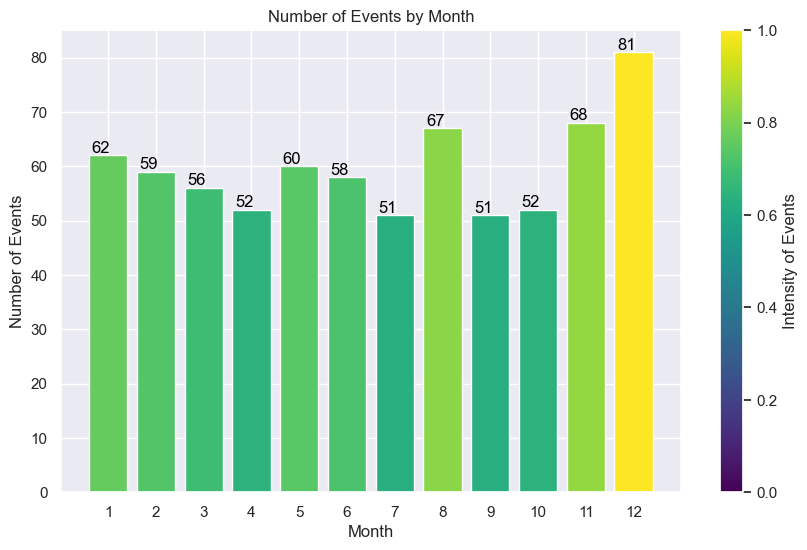

In [8]:

homicidios['fecha'] = pd.to_datetime(homicidios['fecha'])
homicidios['year'] = homicidios['fecha'].dt.year
homicidios['month'] = homicidios['fecha'].dt.month

events_by_month_year = homicidios.groupby(['year', 'month']).size().reset_index(name='count')


events_by_month_year = events_by_month_year.sort_values(by=['year', 'month'])

events_by_month = events_by_month_year.groupby('month')['count'].sum().reset_index(name='total_events')


plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(events_by_month['total_events'] / events_by_month['total_events'].max())

bars = plt.bar(events_by_month['month'], events_by_month['total_events'], color=colors)

for bar, total_events in zip(bars, events_by_month['total_events']):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.5, str(total_events), ha='center', color='black')

plt.title('Number of Events by Month')
plt.xlabel('Month')
plt.ylabel('Number of Events')
plt.xticks(range(1, 13))  

cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.viridis))
cbar.set_label('Intensity of Events')

plt.show()

En este gráfico que concentra la cantidad de eventos por mes podemos observar que durante el periodo de estudio, existe un patrón que indica que hay un incremento de eventos hacia los últimos meses del año noviembre y diciembre.

In [9]:
homicidios["hora"].sort_values( inplace=False, ascending=True)

141    00:00:00
108    00:00:00
3      00:00:00
36     00:00:00
308    00:00:00
         ...   
676    23:30:00
15     23:35:00
486    23:35:00
78     23:37:00
211    23:45:00
Name: hora, Length: 717, dtype: object

In [10]:
homicidios['hora']=pd.to_datetime(homicidios['hora'])

C:\Users\Owner\AppData\Local\Temp\ipykernel_18420\3747746203.py:18: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  heatmap_data = events_by_day_hour.pivot('day_of_week_es', 'hour', 'count')


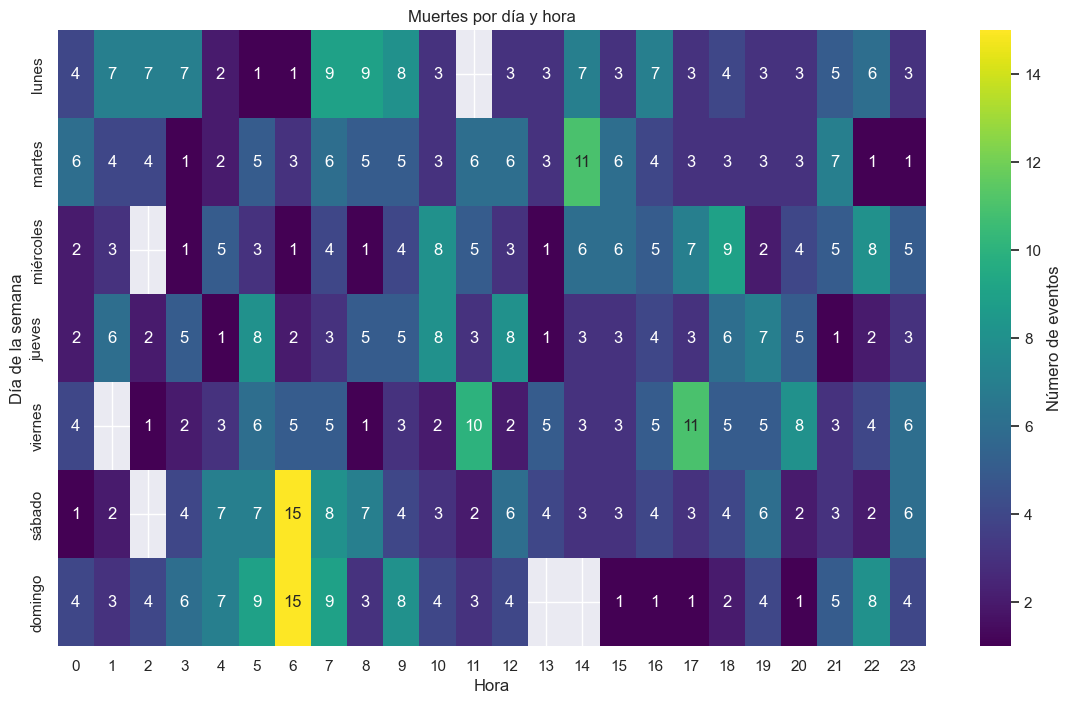

In [26]:
# Suponiendo que 'fecha' es una cadena que representa la fecha, conviértela a formato datetime
homicidios['fecha'] = pd.to_datetime(homicidios['fecha'])

# Crea nuevas columnas para el día de la semana y la hora
homicidios['day_of_week'] = homicidios['fecha'].dt.day_name()
homicidios['hour'] = homicidios['hora'].dt.hour

# Agrupa por día de la semana y hora, y cuenta el número de eventos
events_by_day_hour = homicidios.groupby(['day_of_week', 'hour']).size().reset_index(name='count')

# Crea un diccionario personalizado para los nombres de los días en español
days_order_es = {'Monday': 'lunes', 'Tuesday': 'martes', 'Wednesday': 'miércoles', 'Thursday': 'jueves', 'Friday': 'viernes', 'Saturday': 'sábado', 'Sunday': 'domingo'}

# Asocia los nombres de los días al diccionario personalizado
events_by_day_hour['day_of_week_es'] = events_by_day_hour['day_of_week'].map(days_order_es)

# Pivota los datos para crear una matriz para el mapa de calor
heatmap_data = events_by_day_hour.pivot('day_of_week_es', 'hour', 'count')

# Ordena los días de la semana en el orden correcto (en español)
days_order = ['lunes', 'martes', 'miércoles', 'jueves', 'viernes', 'sábado', 'domingo']
heatmap_data = heatmap_data.reindex(days_order)

# Grafica el mapa de calor
plt.figure(figsize=(14, 8))

sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='g', cbar_kws={'label': 'Número de eventos'})

# Agrega etiquetas y título
plt.xlabel('Hora')
plt.ylabel('Día de la semana')
plt.title('Muertes por día y hora')

plt.show()


El mapa de calor permite cruzar la cantidad de eventos por día y hora indicando que existe un patrón de mayor ocurrencia de eventos los fines de semana: sábado y domingo entre las 5 y 7 de la mañana

C:\Users\Owner\AppData\Local\Temp\ipykernel_15160\2314070064.py:28: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


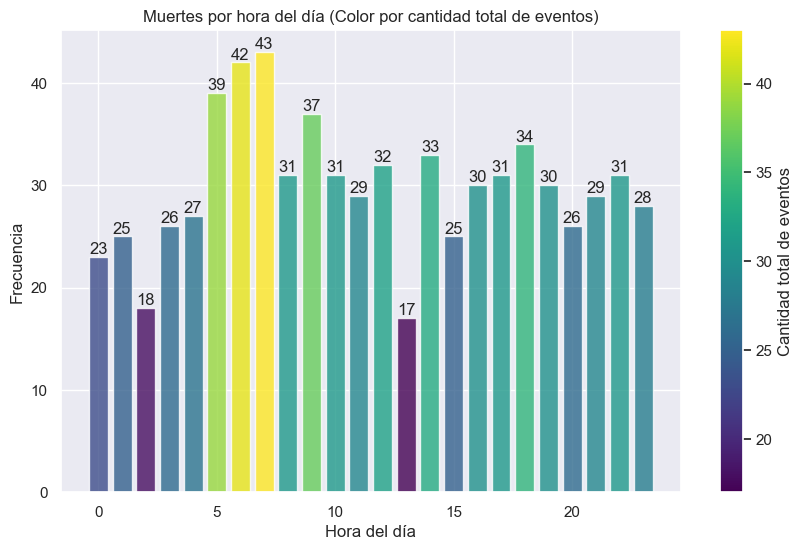

In [58]:
# Extraer la parte de la hora
homicidios['hour'] = pd.to_datetime(homicidios['hora']).dt.hour

# Contar las ocurrencias de cada hora
conteo_horas = homicidios['hour'].value_counts()

# Ordenar el DataFrame por hora
conteo_horas = conteo_horas.sort_index()

# Normalizar las cuentas para que estén en el rango [0, 1]
cuentas_normalizadas = (conteo_horas - conteo_horas.min()) / (conteo_horas.max() - conteo_horas.min())

# Elegir un mapa de colores
cmap = sns.color_palette("viridis", as_cmap=True)

# Graficar el gráfico de barras con color basado en el número total de eventos
plt.figure(figsize=(10, 6))
barras = plt.bar(conteo_horas.index, conteo_horas.values, color=cmap(cuentas_normalizadas), alpha=0.8)

# Anotar cada barra con el recuento directamente encima de la barra
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura, str(int(altura)), ha='center', va='bottom')

# Agregar escala de color
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=conteo_horas.min(), vmax=conteo_horas.max()))
sm.set_array([])  # Un array vacío requerido por ScalarMappable
barra_color = plt.colorbar(sm)
barra_color.set_label('Cantidad total de eventos')

plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Muertes por hora del día (Color por cantidad total de eventos)')
plt.show()


Como verificación extra se tiene la cantidad de eventos solo por hora del dia y encontramos que se repite la tendencia a ocurrir mayor cantidad de eventos entre las 5 y 7 de la mañana.

## EXPLORACION DEMOGRAFICA

Verificamos outliers en edad

In [12]:
homicidios.edad.value_counts()

30    30
29    27
23    25
27    21
28    20
      ..
12     1
92     1
7      1
5      1
88     1
Name: edad, Length: 85, dtype: int64

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


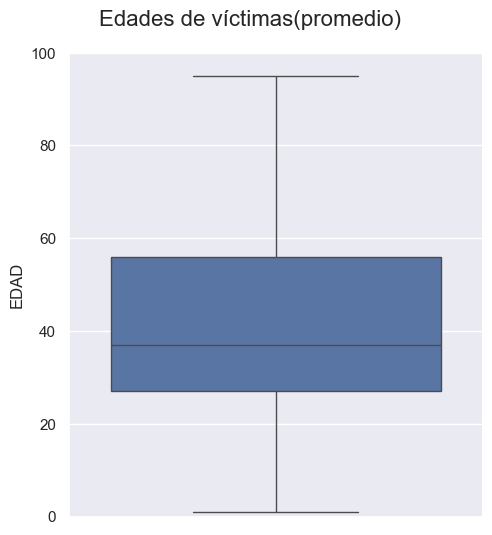

In [13]:
sns.catplot( y="edad", kind='box', data=homicidios)
plt.ylim(0, 100) 
plt.ylabel('EDAD')
plt.suptitle("Edades de víctimas(promedio)", fontsize=16, y=1.05) 
plt.show() 

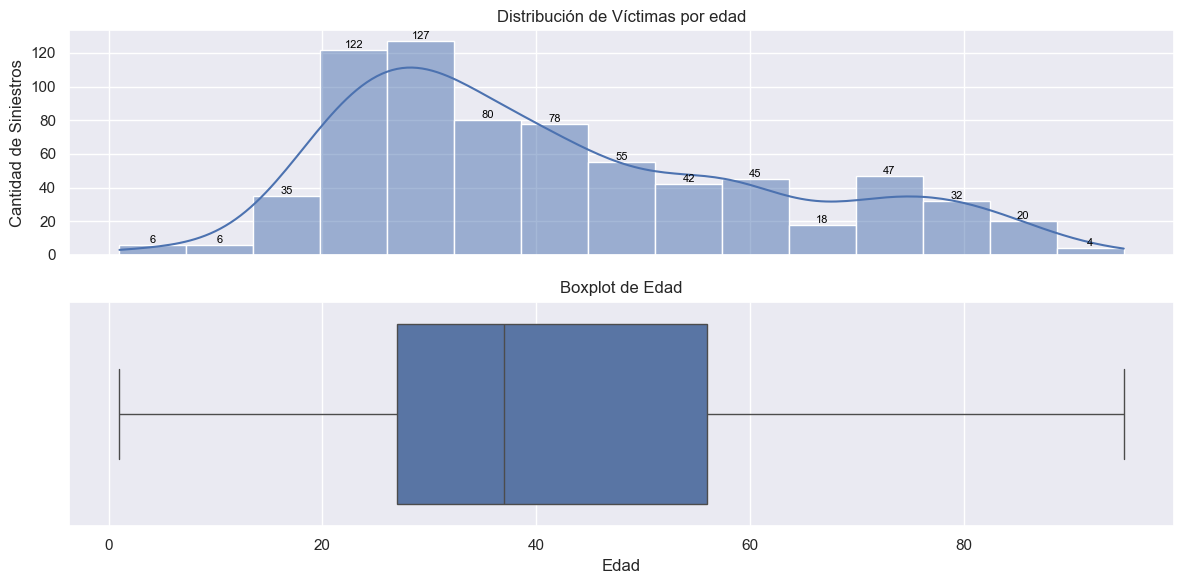

In [14]:


# Se crea una figura con un solo eje x compartido para tener dos gráficos en uno
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Se grafica el histograma de la edad
sns.histplot(homicidios['edad'], kde=True, ax=ax[0]) #se agrega la línea de suavizado
ax[0].set_title('Distribución de Víctimas por edad') ; ax[0].set_ylabel('Cantidad de Siniestros')

# Agregar etiquetas de datos en el histograma
for p in ax[0].patches:
    ax[0].annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=8, color='black')

# Se grafica el boxplot de la edad
sns.boxplot(x=homicidios['edad'], ax=ax[1])
ax[1].set_title('Boxplot de Edad') ; ax[1].set_xlabel('Edad')

# Se ajusta y muestra el gráfico
plt.tight_layout()
plt.show()

# Show the plot
plt.show()

No se encontraron Outliers en la columna edad, así mismo podemos apreciar que existe mayor incidencia de muerte en personas con edades comprendidas entre los 20 y 30 años de edad, en análisis posteriores ahondaremos en esta problemática.

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Cantidad de muertes por rango de edad y sexo')

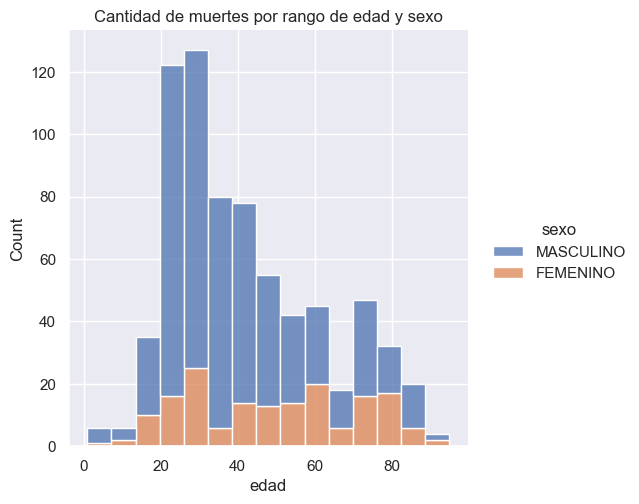

In [15]:

sns.displot(data = homicidios, x='edad', hue='sexo', kind='hist', multiple='stack') 
plt.title('Cantidad de muertes por rango de edad y sexo')

Las personas de sexo masculino representan la mayor parte de los eventos mortales

In [16]:
homicidios.rol.value_counts()

CONDUCTOR               335
PEATON                  271
PASAJERO_ACOMPAÑANTE     81
CICLISTA                 30
Name: rol, dtype: int64

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


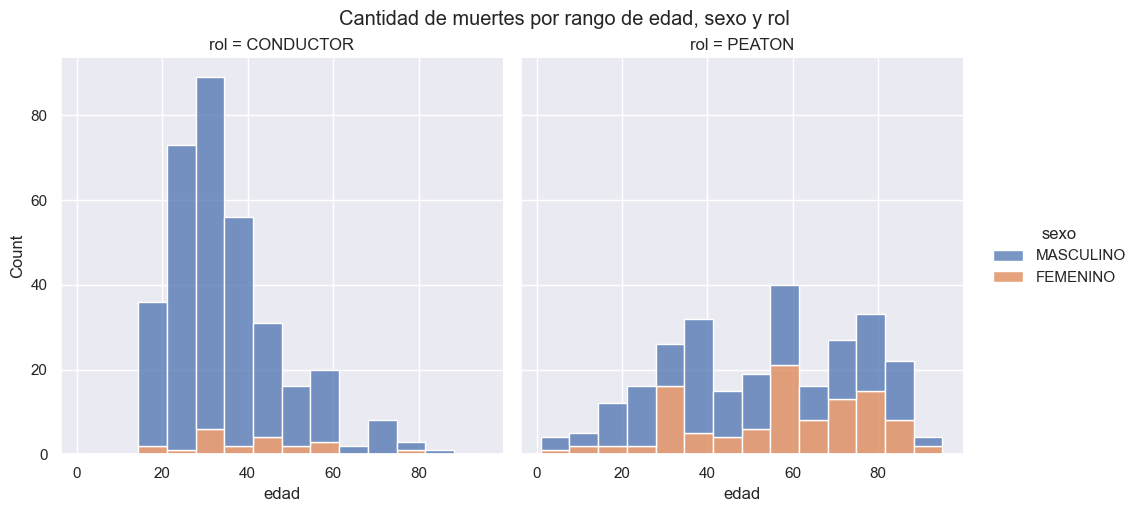

In [27]:
# Filtrar el DataFrame para incluir solo dos categorías de 'rol'
categorias_rol_seleccionadas = ['CONDUCTOR', 'PEATON']
homicidios_filtrados = homicidios[homicidios['rol'].isin(categorias_rol_seleccionadas)]

# Crear un histograma de Seaborn con barras apiladas para 'sexo' y categorías de 'rol' filtradas
sns.displot(data=homicidios_filtrados, x='edad', hue='sexo', kind='hist', multiple='stack', col='rol')

# Personalizar el gráfico
plt.suptitle('Cantidad de muertes por rango de edad, sexo y rol', y=1.02)
plt.show()


c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


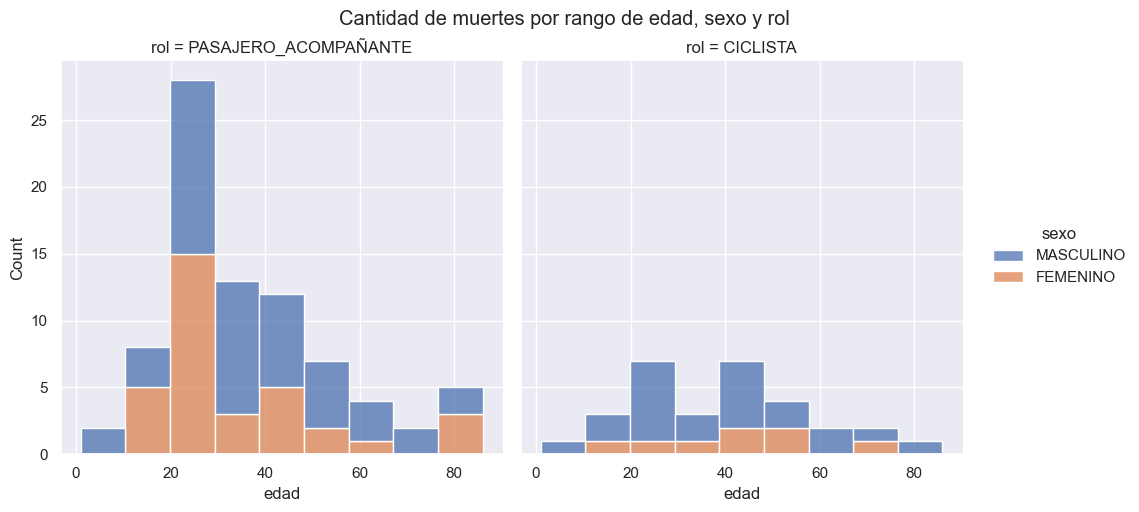

In [18]:
# Categorías de roles seleccionadas
categorias_roles_seleccionadas = ['PASAJERO_ACOMPAÑANTE', 'CICLISTA']
homicidios_filtrados = homicidios[homicidios['rol'].isin(categorias_roles_seleccionadas)]

# Crear un histograma de Seaborn con barras apiladas para 'sexo' y categorías de 'rol' filtradas
sns.displot(data=homicidios_filtrados, x='edad', hue='sexo', kind='hist', multiple='stack', col='rol')

# Personalizar el gráfico
plt.suptitle('Cantidad de muertes por rango de edad, sexo y rol', y=1.02)
plt.show()


En los 4 gráficos anteriores se aprecia lo siguiente:
- La cantidad de muertes como pasajero, ciclista y conductor se concentran en edades alrededor de 20 a 30 años
- las muertes como peatón tienen una ligera tendencia hacia edades por encima de 50 años
- Las muertes como conductor tienen mayor incidencia en hombres, mientras que los demas roles están más uniformemente distribuidos.

In [19]:
homicidios.victima.value_counts()

MOTO           303
PEATON         271
AUTO            94
BICICLETA       30
CARGAS           7
PASAJEROS        5
MOVIL            3
OBJETO FIJO      2
PEATON_MOTO      2
Name: victima, dtype: int64

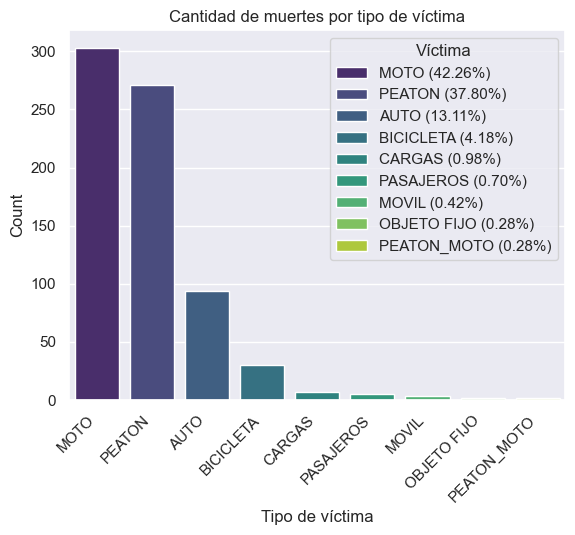

In [20]:
# Ordena el DataFrame según el recuento de cada categoría en orden descendente
orden = homicidios['victima'].value_counts().index
homicidios = homicidios.assign(victima=lambda x: pd.Categorical(x['victima'], categories=orden, ordered=True))

# Calcula los porcentajes para cada categoría
total_cuentas = len(homicidios)
porcentaje_por_categoria = (homicidios['victima'].value_counts() / total_cuentas) * 100

# Crea un countplot de Seaborn con color según la cantidad de eventos y barras ordenadas
grafico = sns.countplot(data=homicidios, x='victima', hue='victima', palette='viridis', order=orden)

# Personaliza el gráfico
grafico.set_xlabel("Tipo de víctima")
grafico.set_ylabel("Recuento")
plt.title('Cantidad de muertes por tipo de víctima')

# Rota las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Agrega una leyenda personalizada con porcentajes
etiquetas_leyenda = [f"{etiqueta} ({porcentaje:.2f}%)"
                     for etiqueta, porcentaje in zip(porcentaje_por_categoria.index, porcentaje_por_categoria)]

# Obtiene la leyenda actual
leyenda = plt.legend(title='Víctima', labels=etiquetas_leyenda)

# Muestra el gráfico
plt.show()


La mayor cantidad de muertes se dan en Motos y Peatones lo que indica que las recomendaciones del análisis deben estar enfocadas en ese tipo de víctimas

In [162]:
homicidios.head()

,Unnamed: 0,fecha,rol,sexo,edad,id,n_victimas,hora,hh,t_calle,...,altura,cruce,direccion,comuna,xy (caba),longitud,latitud,participantes,victima,acusado
0,0,2016-01-01,CONDUCTOR,MASCULINO,19,2016-0001,1,04:00:00,4,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,1,2016-01-02,CONDUCTOR,MASCULINO,70,2016-0002,1,01:15:00,1,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2,2016-01-03,CONDUCTOR,MASCULINO,30,2016-0003,1,07:00:00,7,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,3,2016-01-10,CONDUCTOR,MASCULINO,18,2016-0004,1,00:00:00,0,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,4,2016-01-21,CONDUCTOR,MASCULINO,29,2016-0005,1,05:20:00,5,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


In [22]:
df=homicidios[['id','acusado']]
df1 = df.drop_duplicates(subset='id', keep='first')

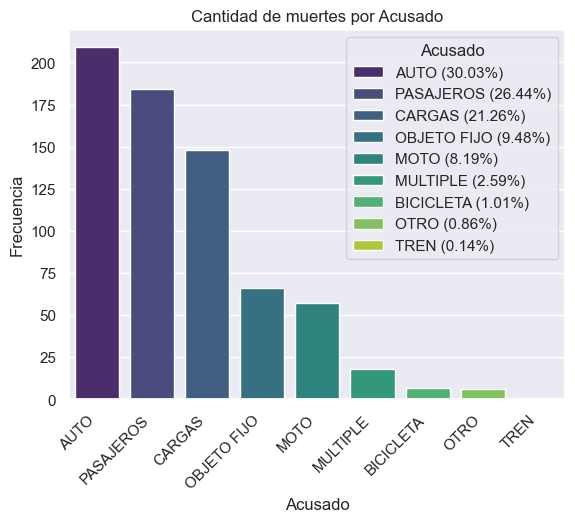

In [23]:

# Ordenar el DataFrame basándose en el recuento de cada categoría en orden descendente
orden = df1['acusado'].value_counts().index
df1 = df1.assign(acusado=lambda x: pd.Categorical(x['acusado'], categories=orden, ordered=True))

# Calcular porcentajes para cada categoría
total_registros = len(df1)
porcentaje_por_categoria = (df1['acusado'].value_counts() / total_registros) * 100

# Crear un countplot de Seaborn con colores según la cantidad de eventos y barras ordenadas
plot = sns.countplot(data=df1, x='acusado', hue='acusado', palette='viridis', order=orden)

# Personalizar el gráfico
plot.set_xlabel("Acusado")
plot.set_ylabel("Frecuencia")
plt.title('Cantidad de muertes por Acusado')

# Rotar las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Agregar una leyenda personalizada con porcentajes
etiquetas_leyenda = [f"{etiqueta} ({porcentaje:.2f}%)"
                     for etiqueta, porcentaje in zip(porcentaje_por_categoria.index, porcentaje_por_categoria)]

# Obtener la leyenda actual
leyenda = plt.legend(title='Acusado', labels=etiquetas_leyenda)

# Mostrar el gráfico
plt.show()


Del mismo modo los acusados con mayor porcentaje de homicidios son autos, vehículos de pasajeros y de cargas.

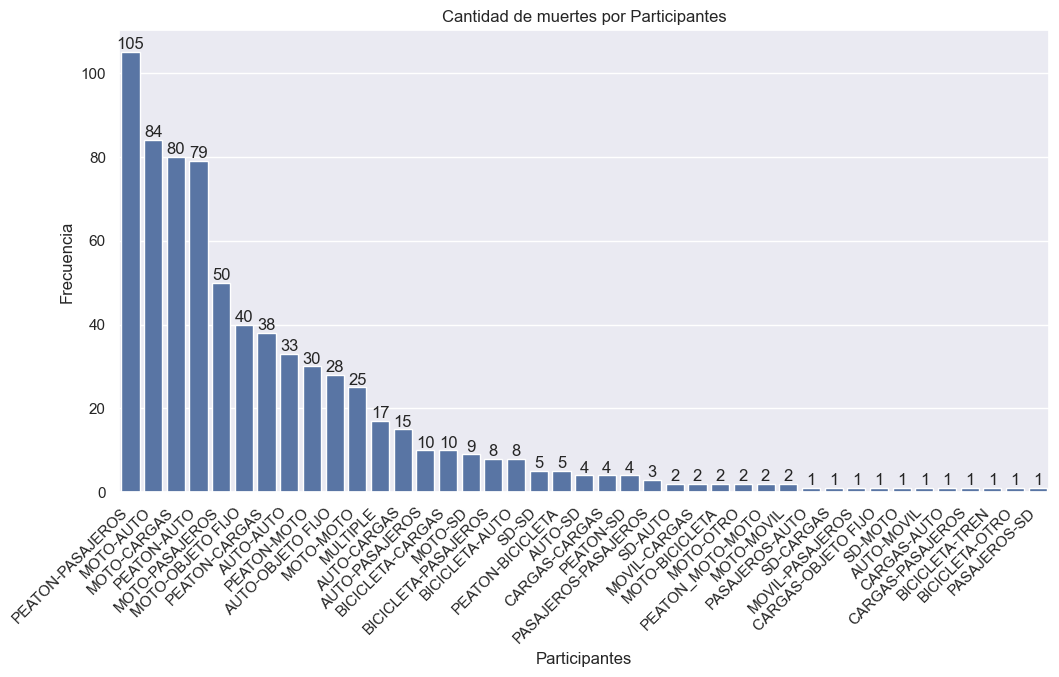

In [28]:
# Ordena el DataFrame basado en el recuento de cada categoría en orden descendente
orden = homicidios['participantes'].value_counts().index
homicidios = homicidios.assign(participantes=lambda x: pd.Categorical(x['participantes'], categories=orden, ordered=True))

# Cuenta las ocurrencias para cada categoría
conteos_por_categoria = homicidios['participantes'].value_counts()

# Aumenta el tamaño del gráfico horizontalmente
plt.figure(figsize=(12, 6))

# Crea un countplot de Seaborn sin especificar colores
grafico = sns.countplot(data=homicidios, x='participantes', order=orden)

# Agrega el recuento total sobre cada barra
for i, recuento in enumerate(conteos_por_categoria):
    grafico.text(i, recuento, str(recuento), ha='center', va='bottom')

# Personaliza el gráfico
grafico.set_xlabel("Participantes")
grafico.set_ylabel("Frecuencia")
plt.title('Cantidad de muertes por Participantes')

# Rota las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=45, ha='right')

# Muestra el gráfico
plt.show()


Es importante notar que los eventos que tienen el mayor porcentaje de muertes son entre Peaton - Pasajeros, Moto - Auto, Moto -Cargas y Peaton - cargas.

C:\Users\Owner\AppData\Local\Temp\ipykernel_18420\4009235238.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.countplot(data=homicidios_sorted, x='comuna', palette='viridis', order=order)


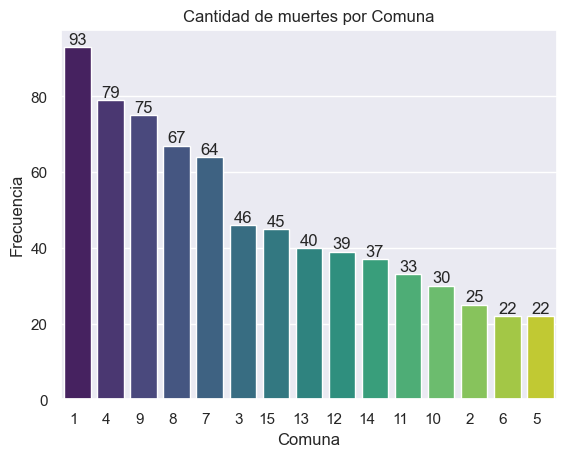

In [25]:
# Ordena el DataFrame basándose en la cuenta de cada categoría en orden descendente
orden = homicidios['comuna'].value_counts().index
homicidios_ordenados = homicidios.assign(comuna=lambda x: pd.Categorical(x['comuna'], categories=orden, ordered=True))

# Crea un countplot de Seaborn con colores según la cantidad de eventos y barras ordenadas
grafico = sns.countplot(data=homicidios_ordenados, x='comuna', palette='viridis', order=orden)

# Agrega las cuentas totales encima de cada barra
for i, cuenta in enumerate(homicidios_ordenados['comuna'].value_counts()):
    grafico.text(i, cuenta, str(cuenta), ha='center', va='bottom')

# Personaliza el gráfico
grafico.set_xlabel("Comuna")
grafico.set_ylabel("Frecuencia")
plt.title('Cantidad de muertes por Comuna')

# Rota las etiquetas del eje x para una mejor visibilidad
plt.xticks(rotation=0, ha='right')

# Muestra el gráfico
plt.show()


La comuna con mayor cantidad de eventos es la comuna 1 sin embargo como veremos más adelante existen otros factores como el tipo de calle que se deben tomar en consideración.

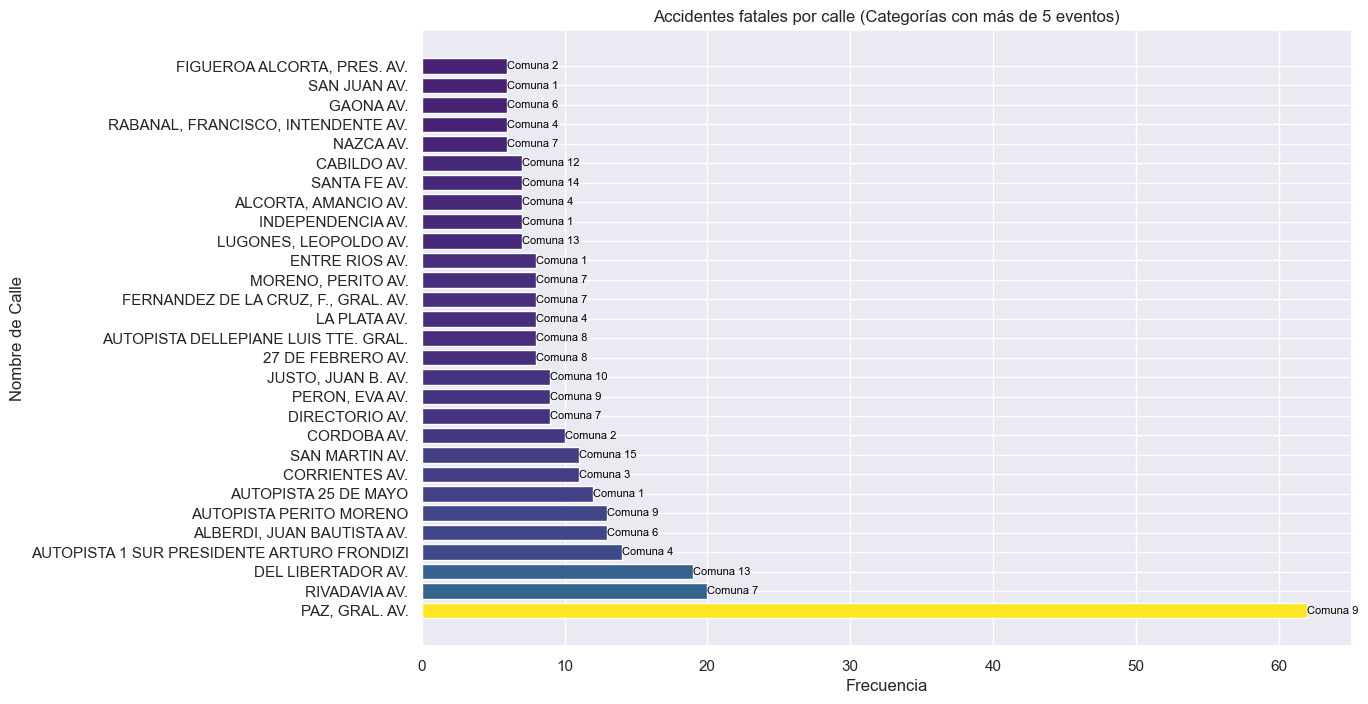

In [29]:
# Filtrar categorías con más de 5 eventos
datos_filtrados = homicidios['calle'].value_counts().loc[lambda x: x > 5]

# Graficar el gráfico de barras horizontal con tamaño ajustado
fig, ax = plt.subplots(figsize=(12, 8))  # Puedes ajustar el tamaño según sea necesario

# Gráfico de barras
barras = ax.barh(datos_filtrados.index, datos_filtrados.values, color=plt.cm.viridis(datos_filtrados.values / datos_filtrados.values.max()))

# Agregar etiquetas y título
ax.set_xlabel('Frecuencia')
ax.set_ylabel('Nombre de Calle')
ax.set_title('Accidentes fatales por calle (Categorías con más de 5 eventos)')

# Agregar valores de 'comuna' en el lado derecho del gráfico
for barra, valor_comuna in zip(barras, datos_filtrados.index):
    etiqueta_comuna = 'Comuna {}'.format(homicidios.loc[homicidios['calle'] == valor_comuna, 'comuna'].iloc[0])
    ax.text(barra.get_width(), barra.get_y() + barra.get_height() / 2, etiqueta_comuna,
            ha='left', va='center', color='black', fontsize=8)

# Mostrar el gráfico
plt.show()


La avenida General Paz que cruza diferentes comunas concentra una gran cantidad de eventos mortales sobrepasando por mucho a las demas vías

### Conclusiones
- No se ha observado un incremento o decremento sostenido en las muertes, se requiere un análisis de indicadores más detallado.
- El descenso en el número de muertes en los años 2019 y 2020 se explica por las medidas tomadas para la pandemia.
- Se ha encontrado que los accidentes que involucran Motos y Peatones como victimas ocupan la mayor cantidad de eventos por lo que debemos concentrar el análisis en estos items.
- Se encontró que los acusados con mayor número de homicidios son los autos, pasajeros y cargas.
- Existe un patrón de mayor probabilidad de ocurrencia los fines de semana (sábado y domingo) entre las 5 y 7 de la mañana
- Existe una mayor tendencia a accidentes fatales en los meses de noviembre y diciembre.